In [ ]:
# this notebook assesses column names within each table
# it aslo assesses which columns within each table actually holds data

In [3]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)

import pandas as pd
import sqlalchemy as db
import urllib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import scipy.sparse as sps
import matplotlib.backends.backend_pdf

In [4]:
# connection
cnn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    r'DBQ=C:\Users\usgwar\Documents\projects\em_catalog\db\default_cat_original.mdb;'
)

cnn_url = f"access+pyodbc:///?odbc_connect={urllib.parse.quote_plus(cnn_str)}"
cnn = db.create_engine(cnn_url)
inspector = db.inspect(cnn)

In [5]:
# get relevant tables
tables = [x for x in inspector.get_table_names() if
         x[0] != '_']

In [6]:
# gets list of all fields from all tables
fields = []
for t in tables:
    cols = inspector.get_columns(t)
    for c in cols:
        if c['name'] not in fields:
            fields.append(c['name'])

In [7]:
def shuffle(f, p):
    files, paths = list(f), list(p)
    random.shuffle(files)
    random.shuffle(paths)
    files, paths = np.asarray(files), np.asarray(paths)
    return files, paths

In [8]:
# shuffle files and paths
# random.seed(42)
# tables, fields = shuffle(tables, fields)

In [9]:
# table_field1 = {}
# for t in tables:
#     df = pd.read_sql_table(t, cnn)
#     cols = inspector.get_columns(t)
#     col_list = []
#     for c in cols:
#         # uncomment if statement to only include fields that contain data
# #         if df[c['name']].isnull().all() == False:
#             col_list.append(c['name'])
#     table_field[t] = col_list

In [10]:
# fields_to_id = {p: i for i, p in enumerate(fields)}
# id_to_fields = {value: key for (key, value) in fields_to_id.items()}

In [11]:
# rows, cols, vals = [], [], []

In [12]:
# for i in range(len(tables)):
#     for field in fields:
#         if field in table_field[tables[i]]:
#             rows.append(fields_to_id[field])
#             cols.append(i)
#             vals.append(1)

In [13]:
def rcv(tables, fields, data_filter):
    table_field = {}
    for t in tables:
        df = pd.read_sql_table(t, cnn)
        cols = inspector.get_columns(t)
        col_list = []
        for c in cols:
            if data_filter == 1:
                if df[c['name']].isnull().all() == False:
                    col_list.append(c['name'])
            elif data_filter == 0:
                col_list.append(c['name'])
        table_field[t] = col_list
        
    fields_to_id = {p: i for i, p in enumerate(fields)}
        
    rows, cols, vals = [], [], []
    
    for i in range(len(tables)):
        for field in fields:
            if field in table_field[tables[i]]:
                rows.append(fields_to_id[field])
                cols.append(i)
                vals.append(1)
                
    return(rows, cols, vals)

In [14]:
rows0, cols0, vals0 = rcv(tables, fields, 0)
rows1, cols1, vals1 = rcv(tables, fields, 1)

In [15]:
# print(vals0)
# print()
# print(vals1)

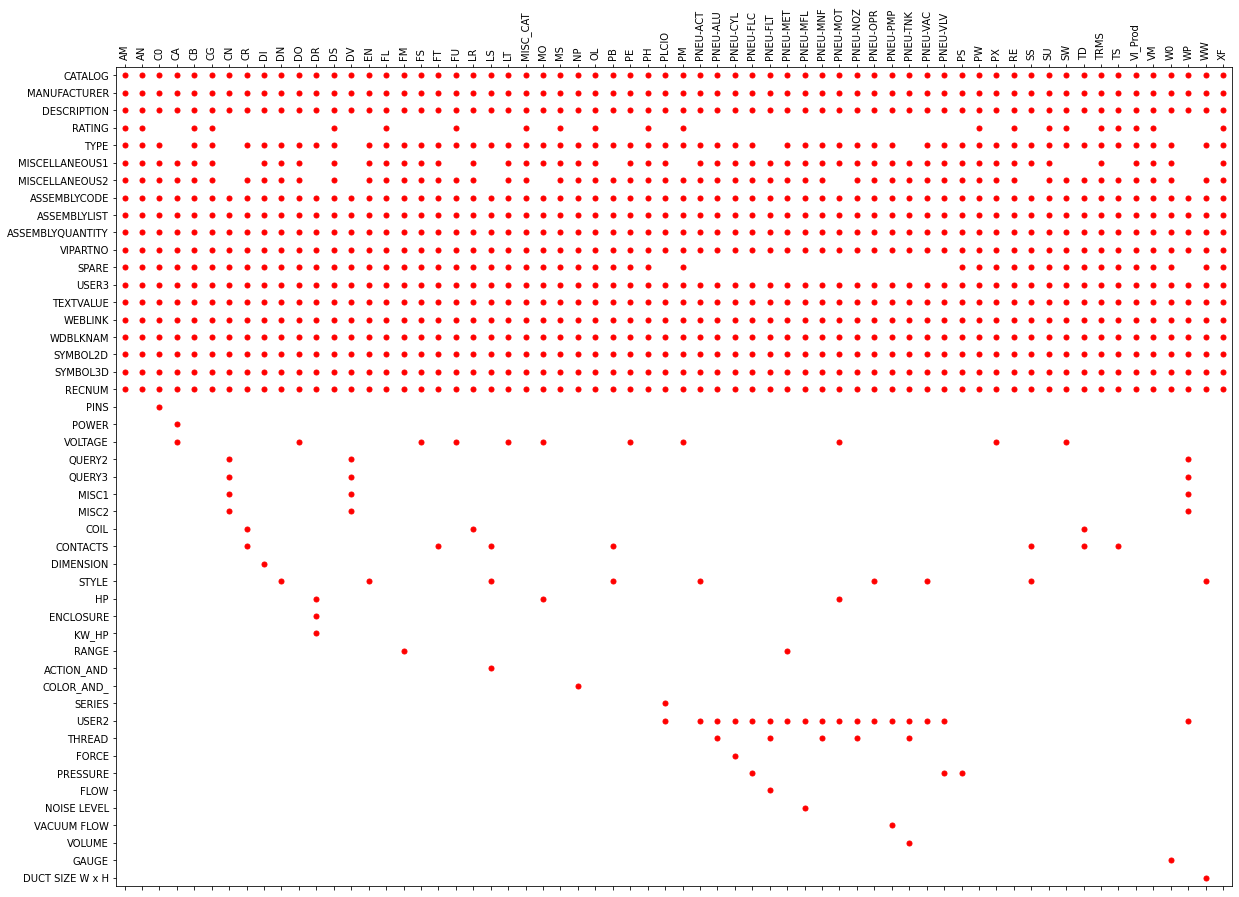

In [22]:
fig = plt.figure(figsize = (20,20))
M = sps.csr_matrix((vals0, (rows0, cols0)), shape=(len(fields), len(tables)))
plt.spy(M, marker='.', markersize=10, color='r')
plt.xticks(np.arange(0, len(tables), 1), tables, rotation=90)
plt.yticks(np.arange(0, len(fields), 1), fields)

fig.savefig('data0.pdf', bbox_inches='tight')

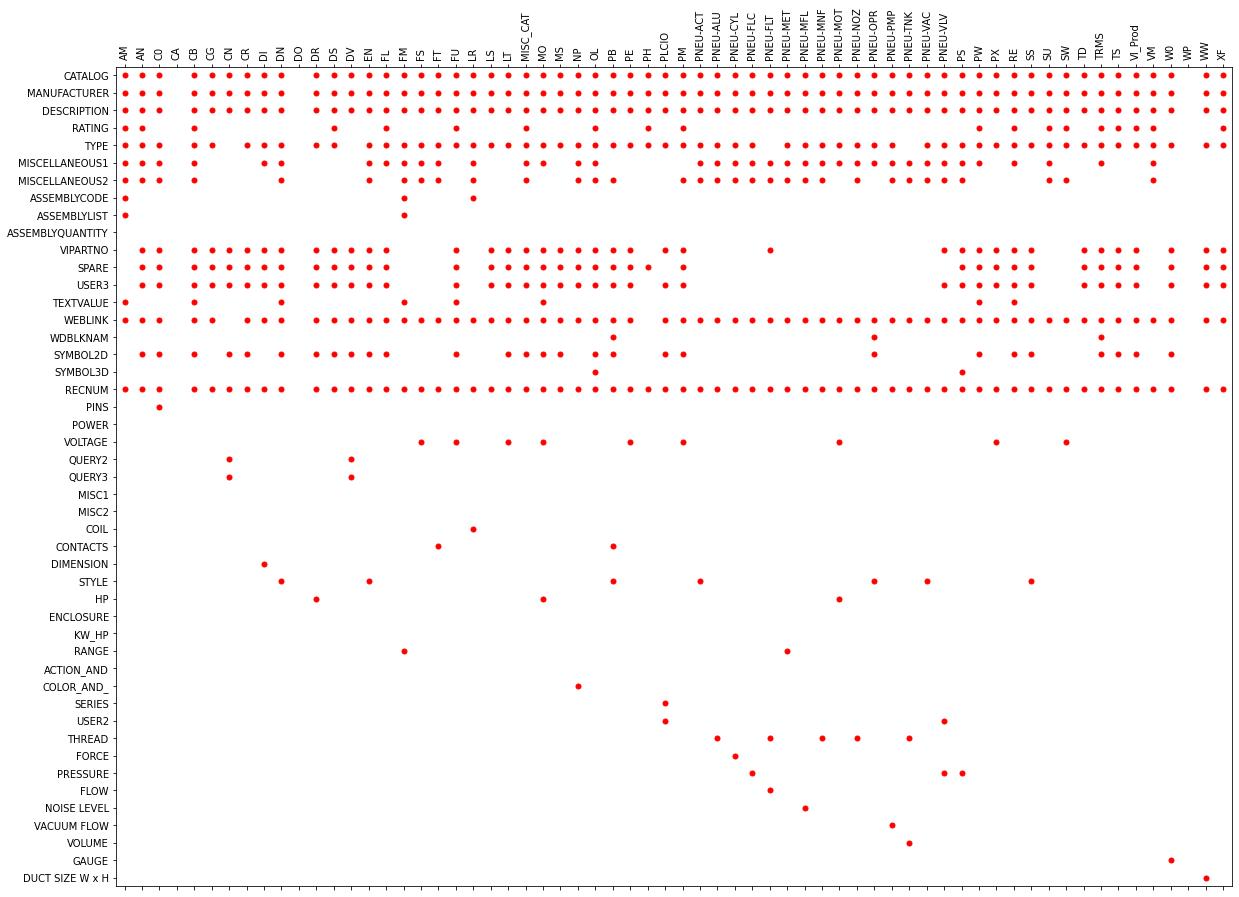

In [142]:
fig = plt.figure(figsize = (20,20))
M = sps.csr_matrix((vals1, (rows1, cols1)), shape=(len(fields), len(tables)))
plt.spy(M, marker='.', markersize=10, color='r')
plt.xticks(np.arange(0, len(tables), 1), tables, rotation=90)
plt.yticks(np.arange(0, len(fields), 1), fields)

fig.savefig('data1.pdf', bbox_inches='tight')

([<matplotlib.axis.YTick at 0x2d466d48>,
 [Text(0, 0, 'CATALOG'),
  Text(0, 1, 'MANUFACTURER'),
  Text(0, 2, 'DESCRIPTION'),
  Text(0, 3, 'RATING'),
  Text(0, 4, 'TYPE'),
  Text(0, 5, 'MISCELLANEOUS1'),
  Text(0, 6, 'MISCELLANEOUS2'),
  Text(0, 7, 'ASSEMBLYCODE'),
  Text(0, 8, 'ASSEMBLYLIST'),
  Text(0, 9, 'ASSEMBLYQUANTITY'),
  Text(0, 10, 'VIPARTNO'),
  Text(0, 11, 'SPARE'),
  Text(0, 12, 'USER3'),
  Text(0, 13, 'TEXTVALUE'),
  Text(0, 14, 'WEBLINK'),
  Text(0, 15, 'WDBLKNAM'),
  Text(0, 16, 'SYMBOL2D'),
  Text(0, 17, 'SYMBOL3D'),
  Text(0, 18, 'RECNUM'),
  Text(0, 19, 'PINS'),
  Text(0, 20, 'POWER'),
  Text(0, 21, 'VOLTAGE'),
  Text(0, 22, 'QUERY2'),
  Text(0, 23, 'QUERY3'),
  Text(0, 24, 'MISC1'),
  Text(0, 25, 'MISC2'),
  Text(0, 26, 'COIL'),
  Text(0, 27, 'CONTACTS'),
  Text(0, 28, 'DIMENSION'),
  Text(0, 29, 'STYLE'),
  Text(0, 30, 'HP'),
  Text(0, 31, 'ENCLOSURE'),
  Text(0, 32, 'KW_HP'),
  Text(0, 33, 'RANGE'),
  Text(0, 34, 'ACTION_AND'),
  Text(0, 35, 'COLOR_AND_'),
  Text(0

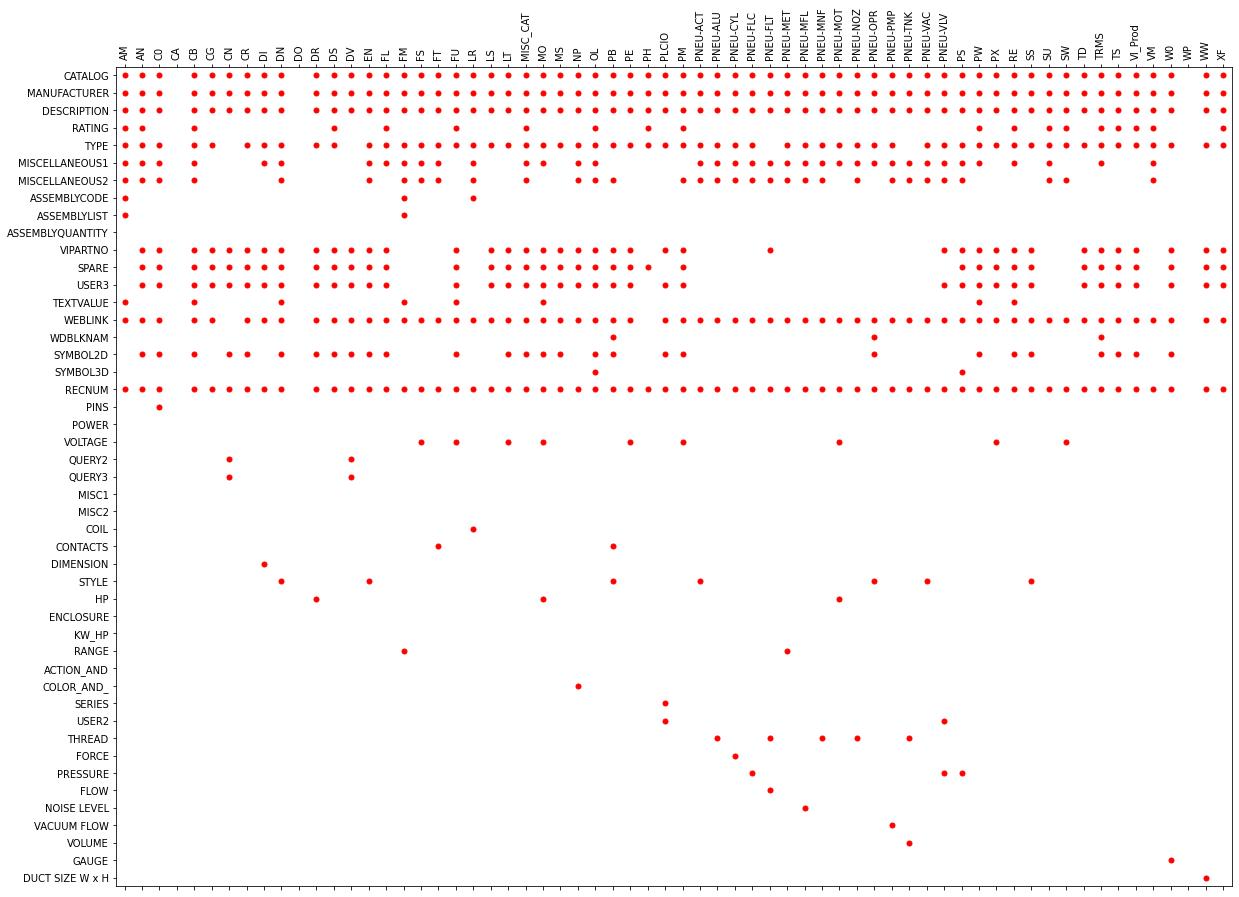

In [29]:
fig, ax = plt.subplots(figsize = (20,20))
M = sps.csr_matrix((vals1, (rows1, cols1)), shape=(len(fields), len(tables)))
ax = plt.spy(M, marker='.', markersize=10, color='r')
plt.xticks(np.arange(0, len(tables), 1), tables, rotation=90)
plt.yticks(np.arange(0, len(fields), 1), fields)